In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split

## Load and Prepare

In [169]:
# Load the dataset (make sure to replace the path with where you've saved the file)
df = pd.read_csv('data/US_Stock_Data.csv')

# Use 'mixed' format if the date format is inconsistent
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# # Set 'id' as the index for time-series analysis
df.set_index(df.columns[0], inplace=True)

In [170]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Date' is the column with date information
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df.set_index('Date', inplace=True)  # Set 'Date' as the index
df.sort_index(inplace=True)  # Sort the DataFrame by the index

In [176]:
# Replace commas in the numeric columns and convert them to floats
df_cleaned = df.replace({',': ''}, regex=True)

# Convert all columns to numeric where possible
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values (e.g., NaNs)
# print(df_cleaned.isnull().sum())

# Fill missing values (if any) using forward-fill or another appropriate method
df_cleaned.fillna(method='ffill', inplace=True)

# Verify the data types after conversion
# print(df_cleaned.dtypes)

# set the cleaned data to the original dataframe
df = df_cleaned

In [195]:
# Calculate the split point
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Verify the split
print("Training data range: {} to {}".format(train.index.min(), train.index.max()))
print("Testing data range: {} to {}".format(test.index.min(), test.index.max()))

Training data range: 2020-08-03 00:00:00 to 2023-05-24 00:00:00
Testing data range: 2023-05-25 00:00:00 to 2024-02-02 00:00:00


In [196]:
df.dropna(inplace=True)  # Remove NaN values.
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities if necessary.

In [197]:
print(df.describe())  # This will give you a statistical summary that can help identify outliers.

       Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  Crude_oil_Vol.  \
count         868.000000        868.000000       868.000000      868.000000   
mean            4.047949     121838.248848        75.273468   329455.645161   
std             1.918675      58711.156615        18.005307   134762.493741   
min             1.834000       1200.000000        35.790000    17020.000000   
25%             2.608000      85367.500000        67.247500   274687.500000   
50%             3.080500     120895.000000        75.645000   339610.000000   
75%             5.186250     154225.000000        85.407500   402227.500000   
max             9.647000     381970.000000       123.700000   872240.000000   

       Copper_Price    Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
count    868.000000     868.000000     868.000000  8.680000e+02   
mean       3.923444   37424.942396   32647.967166  5.730181e+07   
std        0.457349   38404.839136   13564.815313  3.506294e+08   
min        2.802000 

/var/folders/s9/1stspztx1671y14rs3j9m8gm0000gn/T/ipykernel_87489/824981430.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


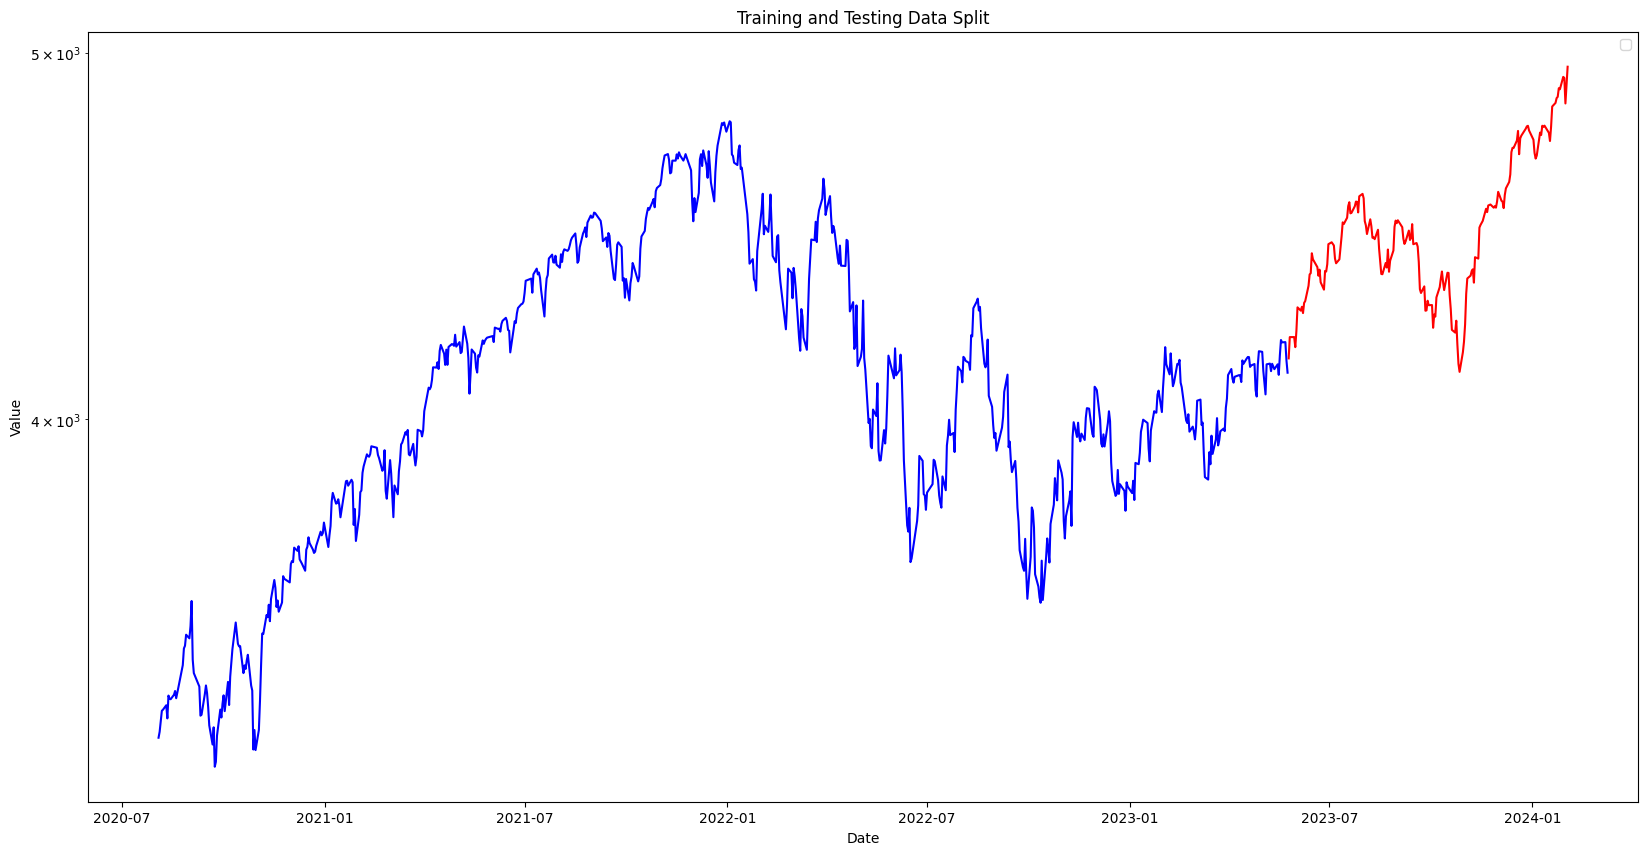

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=100)  # Adjust figsize and dpi as needed.
plt.plot(train.index, train['S&P_500_Price'], color='blue')
plt.plot(test.index, test['S&P_500_Price'], color='red')
plt.title('Training and Testing Data Split')
plt.xlabel('Date')
plt.ylabel('Value')
plt.yscale('log')  # This changes the y-axis to a logarithmic scale.
plt.legend()
plt.show()

In [199]:
# Select the target column while ensuring the index is preserved
y_train = train['S&P_500_Price']

# Check the index of y_train
print(y_train.index)

DatetimeIndex(['2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14',
               ...
               '2023-05-11', '2023-05-12', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24'],
              dtype='datetime64[ns]', name='Date', length=694, freq=None)


In [200]:
# Ensure 'train' DataFrame's index is a DatetimeIndex

train.index = pd.to_datetime(train.index)  # Convert index to DatetimeIndex if necessary
test.index = pd.to_datetime(test.index)  # Convert index to DatetimeIndex if necessary

# Now select the target column
y_train = train['S&P_500_Price']
y_test = test['S&P_500_Price']
print(y_train.index)  # Should now definitely be a DatetimeIndex
print(y_test.index)  # Should now definitely be a DatetimeIndex

DatetimeIndex(['2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14',
               ...
               '2023-05-11', '2023-05-12', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24'],
              dtype='datetime64[ns]', name='Date', length=694, freq=None)
DatetimeIndex(['2023-05-25', '2023-05-26', '2023-05-30', '2023-05-31',
               '2023-06-01', '2023-06-02', '2023-06-05', '2023-06-06',
               '2023-06-07', '2023-06-08',
               ...
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02'],
              dtype='datetime64[ns]', name='Date', length=174, freq=None)


In [208]:
from pmdarima import auto_arima

# Fit the ARIMA model
model = auto_arima(train['S&P_500_Price'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Check the summary of the model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=7314.222, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7314.181, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7315.766, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7315.316, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7312.616, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=7313.766, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=7313.316, Time=0.15 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=7309.936, Time=0.30 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=7310.936, Time=0.95 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=7311.013, Time=0.98 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=7310.666, Time=0.49 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=7311.625, Time=0.40 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=7312.818, Time=1.64 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=7311.923, Time=0.50 sec
 ARIMA(0,1,1)(1,0,1

In [221]:
print(train['S&P_500_Price'].index)

DatetimeIndex(['2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14',
               ...
               '2023-05-11', '2023-05-12', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24'],
              dtype='datetime64[ns]', name='Date', length=694, freq=None)


In [210]:
# Check the type of the index for both train and test dataframes
print("Train Index Type:", type(train.index))
print("Test Index Type:", type(test.index))

# If either is not a DatetimeIndex, convert it
if not isinstance(train.index, pd.DatetimeIndex):
    train.index = pd.to_datetime(train.index)

if not isinstance(test.index, pd.DatetimeIndex):
    test.index = pd.to_datetime(test.index)

Train Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Test Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [222]:
forecast = model.predict(n_periods=len(test.index))
print(forecast)

694    4118.949955
695    4114.573181
696    4115.253455
697    4119.115172
698    4114.533316
          ...     
863    4106.035448
864    4106.036343
865    4106.041424
866    4106.035395
867    4106.035113
Length: 174, dtype: float64


/Users/rustic/Documents/notebooks/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [220]:
# Print the forecast to verify the index
print(forecast.head())

694    4118.949955
695    4114.573181
696    4115.253455
697    4119.115172
698    4114.533316
dtype: float64


In [231]:
# Reassign the test's DatetimeIndex to the forecast
forecast.index = test.index

# print(test['S&P_500_Price'].head())

In [233]:

# Check if the indices are now aligned
print(forecast.tail())

Date
2024-01-29    4106.035448
2024-01-30    4106.036343
2024-01-31    4106.041424
2024-02-01    4106.035395
2024-02-02    4106.035113
dtype: float64


In [226]:
print(test['S&P_500_Price'].head())

Date
2023-05-25    4151.28
2023-05-26    4205.45
2023-05-30    4205.52
2023-05-31    4179.83
2023-06-01    4221.02
Name: S&P_500_Price, dtype: float64


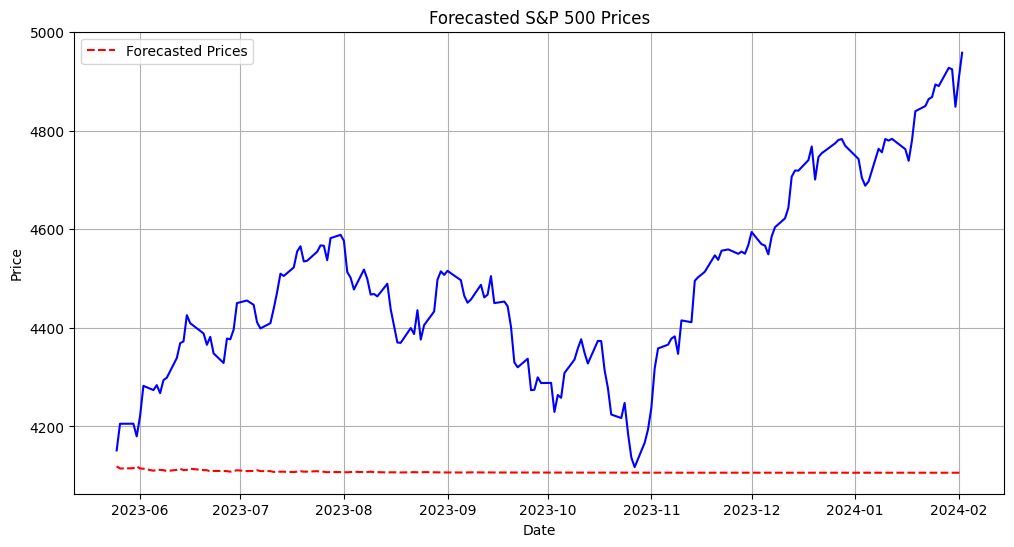

In [230]:
import matplotlib.pyplot as plt

# Plotting the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(forecast.index, forecast, linestyle='--', color='red', label='Forecasted Prices')
plt.title('Forecasted S&P 500 Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(test.index, test['S&P_500_Price'], color='blue')
plt.legend()
plt.grid(True)
plt.show()

In [217]:
from sklearn.metrics import mean_squared_error

# Ensure the indices and lengths of test and forecast align
if len(test) == len(forecast) and all(test.index == forecast.index):
    mse = mean_squared_error(test['S&P_500_Price'], forecast)
    print("Mean Squared Error:", mse)
else:
    print("Error: Test and forecast arrays do not align or have different lengths.")

Error: Test and forecast arrays do not align or have different lengths.


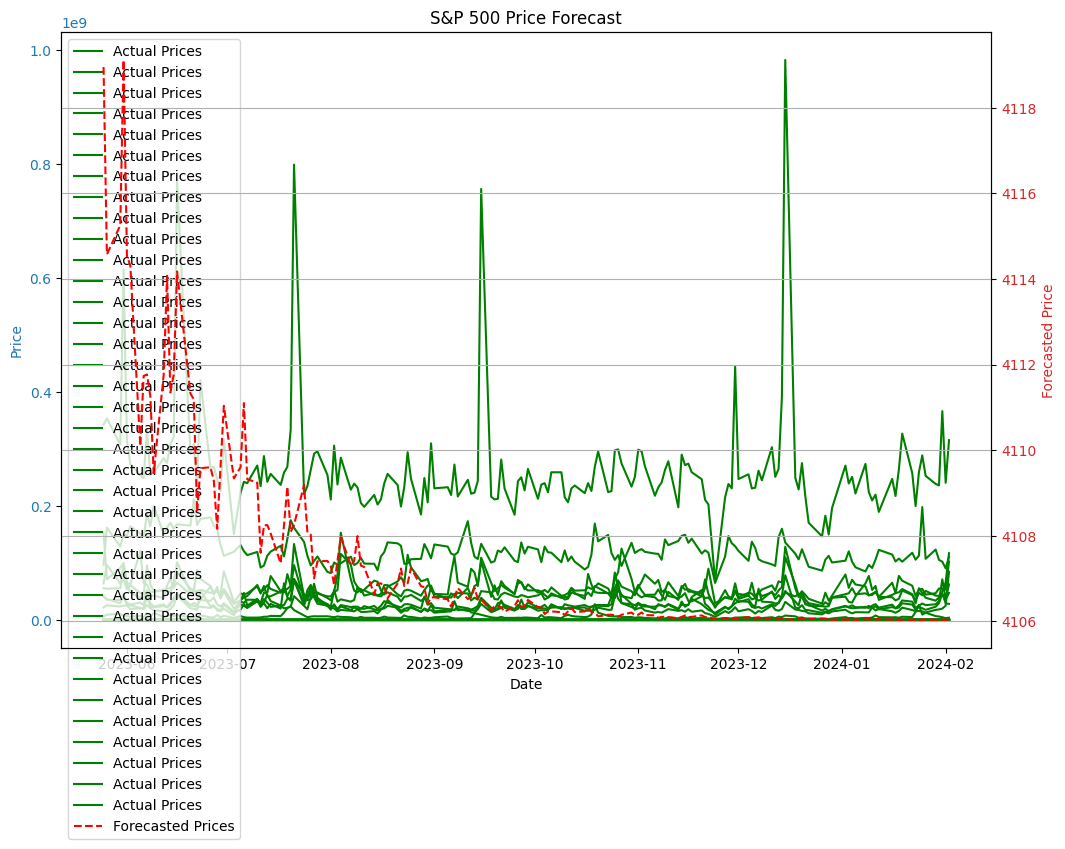

In [228]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='tab:blue')
# ax1.plot(train.index, train, label='Training Data', color='blue')
ax1.plot(test.index, test, label='Actual Prices', color='green')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('Forecasted Price', color='tab:red')  
ax2.plot(forecast.index, forecast, label='Forecasted Prices', linestyle='--', color='red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Added a legend that combines both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('S&P 500 Price Forecast')
plt.grid(True)
plt.show()